# Export RNA data to anndata

In [1]:
import scanpy as sc
import pandas as pd

In [2]:
import os

In [3]:
from pathlib import Path
root_dir = Path("/tscc/projects/ps-epigen/users/biy022/biccn/data/SNAREdata/scenicplus/")
os.chdir(root_dir / "PVALB")

In [4]:
rna_counts = sc.read_mtx("PVALB_rna_matrix.mtx")

In [5]:
rna_counts = rna_counts.T.copy()

In [6]:
cell_meta = pd.read_csv("PVALB_meta_data.tsv", header=0, index_col=0, sep="\t")
gene_names = pd.read_csv("PVALB_gene_names.tsv", header=None, index_col=0, sep="\t")
gene_names.index.name = None

In [7]:
rna_counts.obs = cell_meta
rna_counts.var = gene_names

In [8]:
rna_counts.raw = rna_counts
sc.pp.normalize_total(rna_counts, target_sum=1e4)
sc.pp.log1p(rna_counts)
sc.pp.highly_variable_genes(rna_counts, min_mean=0.0125, max_mean=3, min_disp=0.5)
rna_counts = rna_counts[:, rna_counts.var.highly_variable]
sc.pp.scale(rna_counts, max_value=10)

/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:378: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


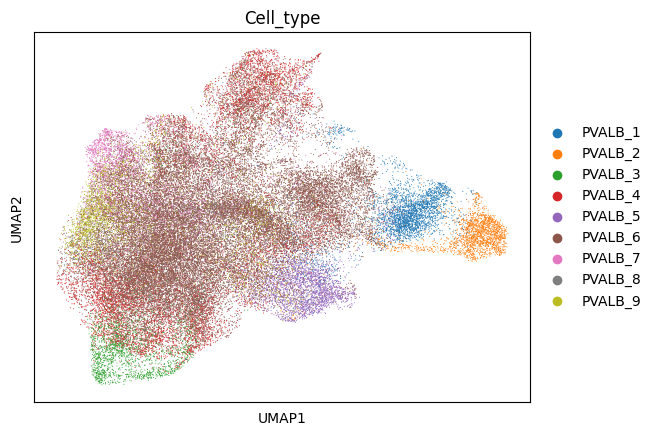

In [10]:
sc.tl.pca(rna_counts)
sc.pp.neighbors(rna_counts)
sc.tl.umap(rna_counts)
sc.pl.umap(rna_counts, color = "Cell_type")

In [11]:
rna_counts.write("PVALB_rna_matrix.h5ad")

In [12]:
rna_counts

AnnData object with n_obs × n_vars = 58062 × 3306
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Batch', 'percent.mt', 'Major_Class', 'PatientID', 'Region', 'Subclass_F', 'Cell_type'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'Cell_type_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [13]:
rna_counts.obs_names[0:5]

Index(['R_20220217E_S1CR65_GCCAAGACACAGCAGAATCCTGTA',
       'R_20210429B_A1CR3_AATCCGTCGTCTGTCACAATGGAA',
       'R_20210513B_S1CR30_CAACCACACATACCAAACATTGGC',
       'R_20210506C_M1CR10_ACAAGCTAAGTACAAGCACTTCGA',
       'R_20220217F_FIR83_TGGCTTCAAACTCACCCACTTCGA'],
      dtype='object')